Analysis of several datasets related to the russian invasion in Ukraine, including info about temporarily forced dislocated people, food prices and russian army losses.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import seaborn as sns
import missingno as msno

Equipment losses 

In [4]:
equipment_df = pd.read_csv('/content/drive/MyDrive/data/russia_losses_equipment.csv')

In [4]:
equipment_df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN


In [5]:
eq = equipment_df.melt(id_vars=["date", "day"], 
        var_name="weapon", 
        value_name="value")

In [6]:
eq.head()

,date,day,weapon,value
0,2022-02-25,2,aircraft,10.0
1,2022-02-26,3,aircraft,27.0
2,2022-02-27,4,aircraft,27.0
3,2022-02-28,5,aircraft,29.0
4,2022-03-01,6,aircraft,29.0


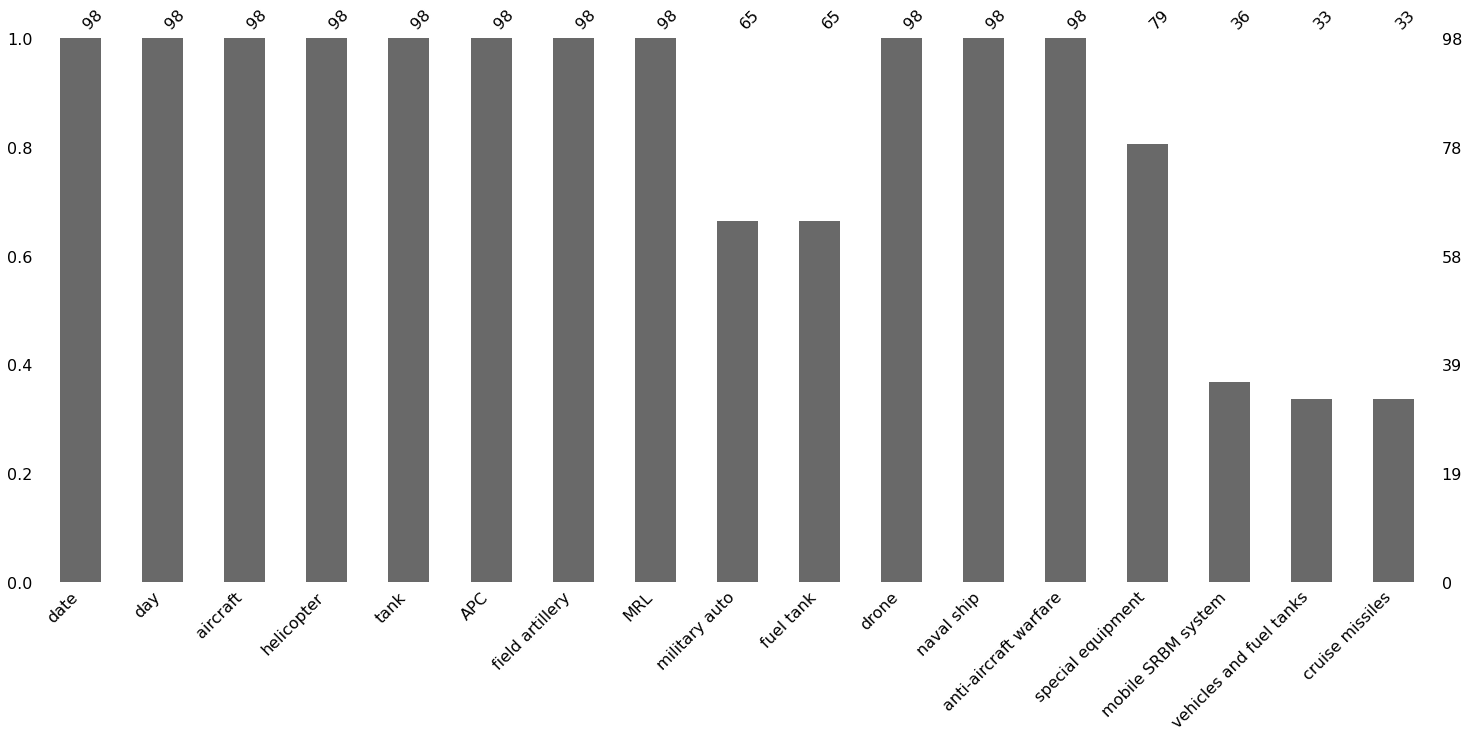

In [7]:
msno.bar(equipment_df)

In [18]:
equipment_df.columns


Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'vehicles and fuel tanks', 'cruise missiles'],
      dtype='object')

In [10]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=equipment_df['date'], y=equipment_df['APC'],
                    mode='lines+markers',
                    name='APC'))
fig.add_trace(go.Scatter(x=equipment_df['date'], y=equipment_df['vehicles and fuel tanks'],
                    mode='lines+markers',
                    name='vehicles and fuel tanks'))
fig.add_trace(go.Scatter(x=equipment_df['date'], y=equipment_df['military auto'],

                    mode='lines+markers',
                    name='Military Auto'))
fig.add_trace(go.Scatter(x=equipment_df['date'], y=equipment_df['field artillery'],

                    mode='lines+markers',
                    name='Field Artillery'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Air",
                  xaxis_title="Date",
                  yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



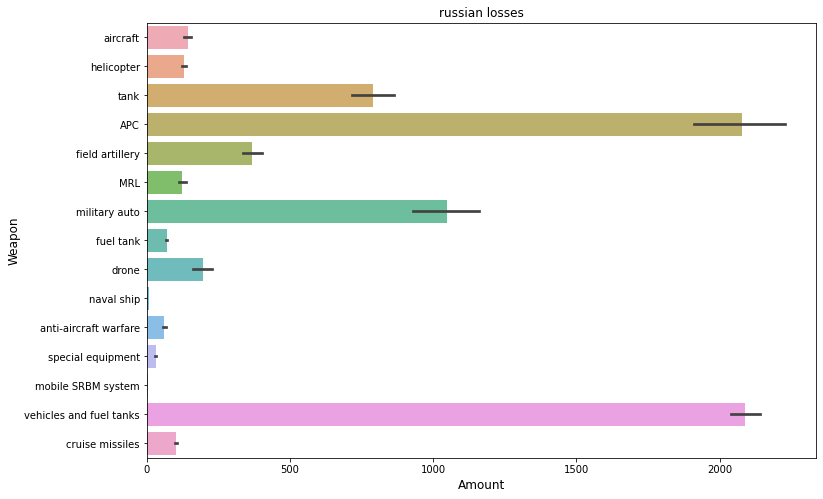

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(eq['value'], eq['weapon'], alpha=0.8)
plt.title('russian losses')
plt.ylabel('Weapon', fontsize=12)
plt.xlabel('Amount', fontsize=12)
plt.show()

Personnel losses

In [5]:
personnel_df = pd.read_csv('/content/drive/MyDrive/data/russia_losses_personnel.csv')
personnel_df.tail()

,date,day,personnel,personnel*,POW
93,2022-05-29,95,30150,about,498
94,2022-05-30,96,30350,about,498
95,2022-05-31,97,30500,about,498
96,2022-06-01,98,30700,about,498
97,2022-06-02,99,30850,about,498


Text(0.5, 1.0, 'Prisoners of war')

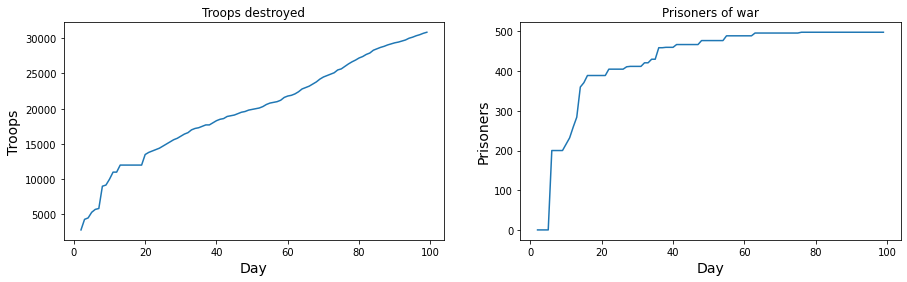

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.lineplot(data=personnel_df, x='day', y='personnel',
            ax=ax[0])
ax[0].set_title("Troops destroyed")
ax[0].set_xlabel('Day', fontsize = 14)
ax[0].set_ylabel('Troops', fontsize = 14)
sns.lineplot(data=personnel_df, x='day', y='POW',
            ax=ax[1])
ax[1].set_ylabel('Prisoners', fontsize = 14)
ax[1].set_xlabel('Day', fontsize = 14)
ax[1].set_title("Prisoners of war")

In [9]:
losses = pd.merge(equipment_df, personnel_df, on="day")
losses.drop('personnel*', axis=1, inplace=True)
losses.head()

,date_x,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,date_y,personnel,POW
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,2022-02-25,2800,0
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,2022-02-26,4300,0
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,2022-02-27,4500,0
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,2022-02-28,5300,0
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,2022-03-01,5710,200


In [10]:
losses.drop(['military auto', 'fuel tank',
       'mobile SRBM system', 'vehicles and fuel tanks', 'cruise missiles', 'day', 'POW'], axis=1, inplace=True)

In [11]:
losses.corr().style.background_gradient(cmap="Blues")

,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,personnel
aircraft,1.000000,0.963670,0.956444,0.950789,0.962089,0.957368,0.853689,0.930081,0.977900,0.948749,0.964836
helicopter,0.963670,1.000000,0.901968,0.904608,0.917049,0.909813,0.768386,0.862729,0.960950,0.963808,0.941313
tank,0.956444,0.901968,1.000000,0.998238,0.994371,0.995414,0.964472,0.975341,0.980266,0.986739,0.989327
APC,0.950789,0.904608,0.998238,1.000000,0.996001,0.993597,0.965697,0.973769,0.979253,0.984419,0.990652
field artillery,0.962089,0.917049,0.994371,0.996001,1.000000,0.990205,0.953586,0.976946,0.981122,0.989577,0.990098
MRL,0.957368,0.909813,0.995414,0.993597,0.990205,1.000000,0.953290,0.973875,0.984232,0.979837,0.991411
drone,0.853689,0.768386,0.964472,0.965697,0.953586,0.953290,1.000000,0.958397,0.901896,0.976501,0.931056
naval ship,0.930081,0.862729,0.975341,0.973769,0.976946,0.973875,0.958397,1.000000,0.950208,0.971737,0.961285
anti-aircraft warfare,0.977900,0.960950,0.980266,0.979253,0.981122,0.984232,0.901896,0.950208,1.000000,0.977198,0.991581
special equipment,0.948749,0.963808,0.986739,0.984419,0.989577,0.979837,0.976501,0.971737,0.977198,1.000000,0.988183
